In [1]:
import os
import argparse
from ta_pet_id.core.utils import get_package_path
from ta_pet_id.pipeline import yolo, efficientnet, matcher
from ta_pet_id.core.base_utils import silence_all_warnings

exceptioncannot open resource
exceptioncannot open resource


Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [2]:
import pandas as pd
from ta_pet_id.core.context import create_context as _create_context
from ta_pet_id.pipeline.main import (enroll_pet as _enroll_pet,
                                     infer_pet_id as _infer_pet_id,
                                     train_efficientnet as _train_efficientnet,
                                     train_yolo as _train_yolo)
from ta_pet_id.data_prep import db_utils
from ta_pet_id.data_prep import core
from ta_pet_id.pipeline import yolo, efficientnet
from ta_pet_id.evaluation.report import get_pipeline_eval_report as _get_pipeline_eval_report
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [3]:
config_path = os.path.join(get_package_path(), "../notebooks/anandu/conf/config.yml")
context_obj = _create_context(config_path)
yolo_model_objs = yolo.load_model(context_obj)

Initialized Random Seed : 0
Context created from c:\users\anandu.nandakuma\desktop\cat_id\cat_visual_id-master\src\../notebooks/anandu/conf/config.yml
Package version : 1.0.0


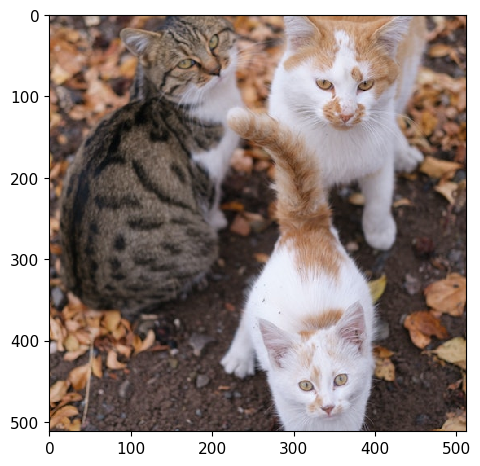

In [18]:
import cv2, skimage
from skimage import io
moon = io.imread(r"C:\Users\anandu.nandakuma\Downloads\pexels-i̇sra-nilgün-özkan-16270924.jpg")

# img = cv2.imread(r"C:\Users\anandu.nandakuma\Desktop\Cat_id\cat_visual_id-master\data\raw\inference_data\house_2\00000225_021__gaussianNoise.jpg")

#three cat image
# img = cv2.imread(r"C:\Users\anandu.nandakuma\Downloads\pexels-i̇sra-nilgün-özkan-16270924.jpg")

io.imshow(moon)
# yolo.predict(context_obj,[img],yolo_model_objs)

In [20]:
yolo.predict(context_obj,[moon],yolo_model_objs)


[[['cat', 'cat', 'cat']],
 [[(283, 451, 0, 157), (253, 410, 352, 512), (89, 265, 0, 128)]],
 [[0.9187667965888977, 0.8888962864875793, 0.810451328754425]],
 [[array([[[153, 116,  90],
           [139, 107,  86],
           [128, 100,  86],
           ...,
           [175, 148, 137],
           [177, 150, 133],
           [182, 150, 135]],
   
          [[161, 124,  97],
           [150, 115,  95],
           [139, 110,  94],
           ...,
           [181, 154, 143],
           [182, 155, 138],
           [183, 151, 136]],
   
          [[172, 133, 104],
           [160, 124, 100],
           [150, 117, 100],
           ...,
           [183, 156, 145],
           [181, 154, 137],
           [181, 149, 134]],
   
          ...,
   
          [[167, 136, 115],
           [174, 143, 123],
           [176, 145, 125],
           ...,
           [164, 125,  94],
           [167, 128,  97],
           [166, 130,  98]],
   
          [[157, 125, 104],
           [165, 134, 114],
           [1

In [154]:

img1 = cv2.imread(r"C:\Users\anandu.nandakuma\Desktop\Cat_id\cat_visual_id-master\data\raw\inference_data\house_2\00000429_024.jpg")
img2 = cv2.imread(r"C:\Users\anandu.nandakuma\Desktop\Cat_id\cat_visual_id-master\data\raw\inference_data\house_2\00000268_014.jpg")
img3 = cv2.imread(r"C:\Users\anandu.nandakuma\Desktop\Cat_id\cat_visual_id-master\data\raw\inference_data\house_2\00001032_007.jpg")
pred = yolo.predict(context_obj,[img1,img2,img3],yolo_model_objs)
a,b,c,d =pred
# bb - (x1,x2,y1,y2)

In [155]:
pred

[[['cat', 'cat'], ['cat', 'cat'], 'cat'],
 [[(165, 254, 187, 297), (276, 342, 25, 93)],
  [(53, 304, 49, 291), (307, 446, 18, 171)],
  (225, 373, 41, 136)],
 [[0.9057300090789795, 0.8568322658538818],
  [0.9261785745620728, 0.7298911809921265],
  0.8544738292694092],
 [[array([[[ 62, 133, 171],
           [ 53, 120, 159],
           [ 31,  94, 132],
           ...,
           [ 96, 174, 211],
           [106, 181, 207],
           [104, 177, 197]],
   
          [[ 39,  92, 129],
           [ 43, 101, 136],
           [ 52, 116, 150],
           ...,
           [ 74, 151, 178],
           [ 66, 132, 150],
           [ 34,  92, 104]],
   
          [[ 50, 112, 153],
           [ 61, 130, 170],
           [ 82, 160, 196],
           ...,
           [ 68, 141, 169],
           [106, 182, 201],
           [106, 175, 185]],
   
          ...,
   
          [[ 82, 113, 122],
           [ 40,  61,  76],
           [ 57,  80,  95],
           ...,
           [ 58,  94, 104],
           [ 52,  

In [156]:
len(pred[-1])

3

In [157]:
eff_net_model = efficientnet.load_model(context_obj)
emb = efficientnet.predict(pred[-1], eff_net_model)

Importing a function (__inference_block1a_activation_layer_call_and_return_conditional_losses_2077924) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
Importing a function (__inference_block6d_activation_layer_call_and_return_conditional_losses_2082068) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
Importing a function (__inference_block1a_se_reduce_layer_call_and_return_conditional_losses_2102657) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
Importing a function (__inference_block2c_se_reduce_layer_call_and_return_conditional_losses_2104860) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
Importing a function (__inference_block4b_expand_activation_layer_call_and_return_conditional_losses_2107608) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
Importing a function (__inference_block7a_expand_activa

In [158]:
len(emb[0])
pred[0]

[['cat', 'cat'], ['cat', 'cat'], 'cat']

In [159]:
import numpy as np
res = []
pred_pet_embds = emb
pred_pet_types = pred[0]

enrolled_hh_pets_db = df

for pred_embed, pred_pet_type in zip(pred_pet_embds, pred_pet_types):
    
    if pred_embed is None or pred_pet_type is None:
        res.append(None)
        continue

    elif (
        type(pred_embed) == list or type(pred_pet_type) == list):  # If there is any multi detection it type will be list
        pred_pet_id = []
        d={}
        ids = []
        # for pred_em, pred_pet_ty in zip(pred_embed,pred_pet_type):

        for rows in range(0, len(pred_embed)):
            house_sub_db = enrolled_hh_pets_db[
                enrolled_hh_pets_db["pet_type"] == pred_pet_type[rows]
            ]

            if len(house_sub_db) == 0:
                # Assuming all pets are enrolled, YOLO prediction of pet type could be wrong.
                house_sub_db = enrolled_hh_pets_db.copy()
            min_dist = 99999
            for i in range(len(house_sub_db)):
                row = house_sub_db.iloc[i]
                dist = np.sum(
                    np.square(np.subtract(row["embedding"], pred_embed[rows]))
                )
                if dist < min_dist:
                    min_dist = dist
                    d[row["pet_id"]]=dist
            ids.append(sorted(d.items(), key=lambda x:x[1])[0][0])
        pred_pet_id.append(ids)

    else:
        house_sub_db = enrolled_hh_pets_db[
            enrolled_hh_pets_db["pet_type"] == pred_pet_type
        ]
        if len(house_sub_db) == 0:
            # Assuming all pets are enrolled, YOLO prediction of pet type could be wrong.
            house_sub_db = enrolled_hh_pets_db.copy()
        min_dist = 99999
        pred_pet_id = None
        for i in range(len(house_sub_db)):
            row = house_sub_db.iloc[i]
            dist = np.sum(np.square(np.subtract(row["embedding"], pred_embed)))
            if dist < min_dist:
                min_dist = dist
            pred_pet_id = row["pet_id"]

    res.append(pred_pet_id)
res


[[['Coffee', 'Coffee']], [['Coffee', 'Coffee']], 'Coffee']

In [14]:
pred[-1][0][0]

array([[[ 39,  64, 128],
        [ 28,  68, 117],
        [ 45,  91, 145],
        ...,
        [ 11,  42, 103],
        [ 12,  43, 104],
        [ 21,  49, 113]],

       [[ 26,  68, 133],
        [ 29,  64, 120],
        [ 39,  62, 100],
        ...,
        [ 14,  48, 108],
        [ 14,  41,  98],
        [ 22,  50, 115]],

       [[ 23,  60, 122],
        [ 28,  56, 103],
        [ 32,  54,  95],
        ...,
        [ 14,  48, 108],
        [ 23,  44,  99],
        [ 34,  57, 113]],

       ...,

       [[ 24,  34,  44],
        [ 22,  27,  42],
        [ 13,   8,  39],
        ...,
        [ 26,  24,  24],
        [ 50,  46,  52],
        [ 53,  53,  47]],

       [[ 30,  23,  66],
        [ 26,  35,  48],
        [ 93, 112, 125],
        ...,
        [ 31,  32,  28],
        [ 48,  47,  51],
        [ 30,  28,  34]],

       [[ 68,  83,  86],
        [ 75,  81,  88],
        [120, 123, 114],
        ...,
        [ 41,  38,  47],
        [ 27,  28,  26],
        [ 13,  16,  14]]

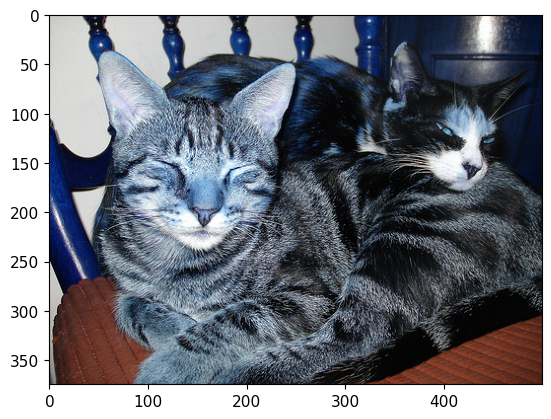

In [15]:
plt.imshow(img)

Class :  cat
confidence score :  0.9338444471359253


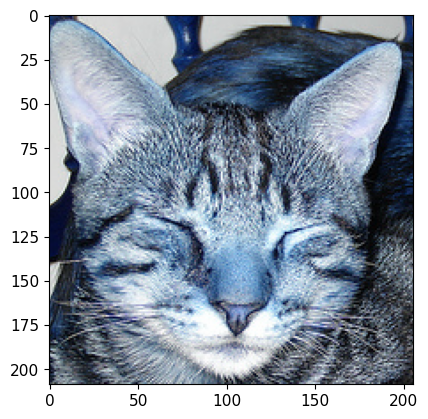

In [25]:
print('Class : ', pred[0][0][0])
print('confidence score : ', pred[2][0][0])
plt.imshow(pred[-1][0][0])


Class :  cat
confidence score :  0.9093174934387207


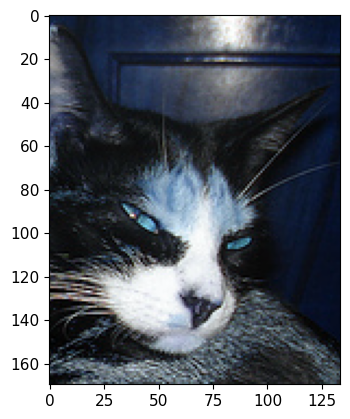

In [27]:
print('Class : ', pred[0][0][1])
print('confidence score : ', pred[2][0][1])
plt.imshow(pred[-1][0][1])


In [ ]:
 l = [[[51.0, 34.0, 257.0, 243.0, 0.9338444471359253, 0.0], [359.0, 23.0, 493.0, 193.0, 0.9093174934387207, 0.0]]]
len(l[0])

2

In [ ]:
len(l)

1

In [7]:

img = cv2.imread(r"C:\Users\anandu.nandakuma\Desktop\Cat_id\cat_visual_id-master\data\raw\inference_data\house_2\00000225_021__gaussianNoise.jpg")
pred = yolo.predict(context_obj,[img],yolo_model_objs)
# pred[0]
# bb - (x1,x2,y1,y2)

1

In [29]:
img1 = cv2.imread(r"C:\Users\anandu.nandakuma\Desktop\Cat_id\data\yolo_full_data\images\val\00000001_012.jpg")
img2 = cv2.imread(r"C:\Users\anandu.nandakuma\Desktop\Cat_id\data\yolo_full_data\images\val\00000024_024.jpg")


yolo.predict(context_obj,[img1,img2],yolo_model_objs)
list(filter(lambda x: x is not None, pred_pet_faces))

[['cat', 'cat'],
 [(44, 284, 12, 205), (73, 305, 0, 260)],
 [0.8632349371910095, 0.9404815435409546],
 [array([[[ 67,  54,  38],
          [ 64,  51,  35],
          [ 59,  48,  34],
          ...,
          [153, 160, 157],
          [149, 160, 158],
          [159, 165, 170]],
  
         [[ 70,  55,  39],
          [ 65,  52,  36],
          [ 62,  49,  35],
          ...,
          [162, 166, 161],
          [157, 168, 166],
          [168, 174, 179]],
  
         [[ 71,  57,  39],
          [ 68,  53,  37],
          [ 63,  50,  36],
          ...,
          [158, 162, 156],
          [157, 168, 166],
          [164, 175, 179]],
  
         ...,
  
         [[  2,   3,   1],
          [  2,   3,   1],
          [  2,   3,   1],
          ...,
          [197, 203, 202],
          [173, 180, 177],
          [158, 164, 163]],
  
         [[  2,   3,   1],
          [  2,   3,   1],
          [  2,   3,   1],
          ...,
          [181, 185, 186],
          [172, 176, 177],
       

In [5]:
img1 = cv2.imread(r"C:\Users\anandu.nandakuma\Desktop\Cat_id\data\yolo_full_data\images\val\00000001_012.jpg")
img2 = cv2.imread(r"C:\Users\anandu.nandakuma\Desktop\Cat_id\data\yolo_full_data\images\val\00000024_024.jpg")
img3 = cv2.imread(r"C:\Users\anandu.nandakuma\Desktop\Cat_id\data\yolo_full_data\images\val\00000075_026.jpg")


yolo.predict(context_obj,[img1,img2,img3],yolo_model_objs)

[['cat', 'cat', ['cat', 'cat']],
 [(44, 284, 12, 205),
  (73, 305, 0, 260),
  [(51, 257, 34, 243), (359, 493, 23, 193)]],
 [0.8632349371910095,
  0.9404815435409546,
  [0.9338444471359253, 0.9093174934387207]],
 [array([[[ 67,  54,  38],
          [ 64,  51,  35],
          [ 59,  48,  34],
          ...,
          [153, 160, 157],
          [149, 160, 158],
          [159, 165, 170]],
  
         [[ 70,  55,  39],
          [ 65,  52,  36],
          [ 62,  49,  35],
          ...,
          [162, 166, 161],
          [157, 168, 166],
          [168, 174, 179]],
  
         [[ 71,  57,  39],
          [ 68,  53,  37],
          [ 63,  50,  36],
          ...,
          [158, 162, 156],
          [157, 168, 166],
          [164, 175, 179]],
  
         ...,
  
         [[  2,   3,   1],
          [  2,   3,   1],
          [  2,   3,   1],
          ...,
          [197, 203, 202],
          [173, 180, 177],
          [158, 164, 163]],
  
         [[  2,   3,   1],
          [  2,   3, 

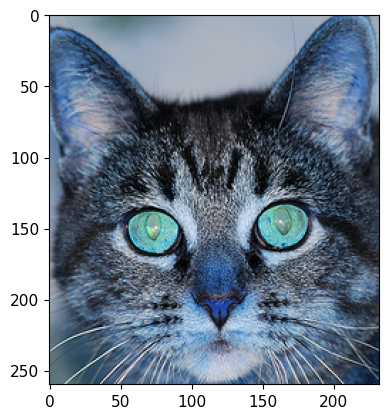

In [ ]:
# plt.imshow(rslt[-1][-1][2])
plt.imshow(rslt[-1][2][1])

In [8]:
res = yolo.predict(context_obj,[img3],yolo_model_objs)
res

[[['cat', 'cat']],
 [[(51, 257, 34, 243), (359, 493, 23, 193)]],
 [[0.9338444471359253, 0.9093174934387207]],
 [[array([[[ 39,  64, 128],
           [ 28,  68, 117],
           [ 45,  91, 145],
           ...,
           [ 11,  42, 103],
           [ 12,  43, 104],
           [ 21,  49, 113]],
   
          [[ 26,  68, 133],
           [ 29,  64, 120],
           [ 39,  62, 100],
           ...,
           [ 14,  48, 108],
           [ 14,  41,  98],
           [ 22,  50, 115]],
   
          [[ 23,  60, 122],
           [ 28,  56, 103],
           [ 32,  54,  95],
           ...,
           [ 14,  48, 108],
           [ 23,  44,  99],
           [ 34,  57, 113]],
   
          ...,
   
          [[ 24,  34,  44],
           [ 22,  27,  42],
           [ 13,   8,  39],
           ...,
           [ 26,  24,  24],
           [ 50,  46,  52],
           [ 53,  53,  47]],
   
          [[ 30,  23,  66],
           [ 26,  35,  48],
           [ 93, 112, 125],
           ...,
           [ 31

In [9]:
res[0]

[['cat', 'cat']]

In [48]:
c,bb,con,crop = yolo.predict(context_obj,[img1,img2,img3],yolo_model_objs)
# len(list(filter(lambda x: x is not None, crop)))
len(crop[0])

193

In [53]:
l=[1,2,3,[5,6]]
for i in l:
    if type(i)==list:
        print(i)

[5, 6]


In [50]:
l=[1,2,3,[5,6]]

type(l)

list

In [6]:
c,bb,con,crop = yolo.predict(context_obj,[img1,img2],yolo_model_objs)

eff_net_model = efficientnet.load_model(context_obj)
efficientnet.predict(crop, eff_net_model)

Importing a function (__inference_block1a_activation_layer_call_and_return_conditional_losses_2077924) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
Importing a function (__inference_block6d_activation_layer_call_and_return_conditional_losses_2082068) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
Importing a function (__inference_block1a_se_reduce_layer_call_and_return_conditional_losses_2102657) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
Importing a function (__inference_block2c_se_reduce_layer_call_and_return_conditional_losses_2104860) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
Importing a function (__inference_block4b_expand_activation_layer_call_and_return_conditional_losses_2107608) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
Importing a function (__inference_block7a_expand_activa

array([[0.10069677978754044, -0.05963608995079994, 0.13518723845481873, 0.006315464619547129, 0.2804800271987915, 0.0647185742855072, 0.06843694299459457, 0.25894373655319214, -0.12331459671258926, -0.1567121297121048, -0.18574321269989014, -0.07522404193878174, 0.047625795006752014, 0.12214888632297516,
        0.09694161266088486, -0.13961565494537354, -0.023227045312523842, 0.2514415383338928, 0.0798829197883606, 0.0557890310883522, 0.016400225460529327, -0.03594127669930458, -0.028313318267464638, 0.0025097604375332594, 0.19799582660198212, -0.08317647129297256, -0.08228010684251785, 0.02570308744907379,
        -0.027938328683376312, -0.027117718011140823, 0.036441318690776825, -0.012659391388297081, 0.028717435896396637, -0.024086307734251022, 0.10239876061677933, -0.044933486729860306, -0.06821362674236298, -0.03149686008691788, -0.23896625638008118, 0.11312321573495865, 0.14473751187324524, -0.027059927582740784,
        -0.06414560973644257, -0.16556070744991302, 0.20136436820

In [10]:
c,bb,con,crop = yolo.predict(context_obj,[img1,img2,img3],yolo_model_objs)

eff_net_model = efficientnet.load_model(context_obj)
embed = efficientnet.predict(crop, eff_net_model)
embed

Importing a function (__inference_block1a_activation_layer_call_and_return_conditional_losses_2077924) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
Importing a function (__inference_block6d_activation_layer_call_and_return_conditional_losses_2082068) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
Importing a function (__inference_block1a_se_reduce_layer_call_and_return_conditional_losses_2102657) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
Importing a function (__inference_block2c_se_reduce_layer_call_and_return_conditional_losses_2104860) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
Importing a function (__inference_block4b_expand_activation_layer_call_and_return_conditional_losses_2107608) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
Importing a function (__inference_block7a_expand_activa

array([array([     0.1007,   -0.059636,     0.13519,   0.0063155,     0.28048,    0.064719,    0.068437,     0.25894,    -0.12331,    -0.15671,    -0.18574,   -0.075224,    0.047626,     0.12215,    0.096942,    -0.13962,   -0.023227,     0.25144,    0.079883,    0.055789,      0.0164,   -0.035941,   -0.028313,   0.0025098,
                    0.198,   -0.083176,    -0.08228,    0.025703,   -0.027938,   -0.027118,    0.036441,   -0.012659,    0.028717,   -0.024086,      0.1024,   -0.044933,   -0.068214,   -0.031497,    -0.23897,     0.11312,     0.14474,    -0.02706,   -0.064146,    -0.16556,     0.20136,    0.049238,   -0.050218,      0.1079,
                 -0.19258,     0.17347,   -0.062329,    -0.16598,    -0.22245,    -0.27017,   -0.053968,   -0.005229,    -0.11181,     0.16456,   -0.044895,   -0.093305,   -0.010114,    -0.14558,     0.24415,    0.013253], dtype=float32)                                                                                        ,
       array([   0.06

In [13]:
cls = ['cat', 'cat', ['cat', 'cat']]

emb = embed

res = []
for e,c in zip (emb , cls):
    if e is None or c is None:
        res.append(None)
        continue
    
    


cat

[     0.1007   -0.059636     0.13519   0.0063155     0.28048    0.064719    0.068437     0.25894    -0.12331    -0.15671    -0.18574   -0.075224    0.047626     0.12215    0.096942    -0.13962   -0.023227     0.25144    0.079883    0.055789      0.0164   -0.035941   -0.028313   0.0025098       0.198   -0.083176
    -0.08228    0.025703   -0.027938   -0.027118    0.036441   -0.012659    0.028717   -0.024086      0.1024   -0.044933   -0.068214   -0.031497    -0.23897     0.11312     0.14474    -0.02706   -0.064146    -0.16556     0.20136    0.049238   -0.050218      0.1079    -0.19258     0.17347   -0.062329    -0.16598
    -0.22245    -0.27017   -0.053968   -0.005229    -0.11181     0.16456   -0.044895   -0.093305   -0.010114    -0.14558     0.24415    0.013253]
cat

[   0.062076   -0.016824    -0.22943     0.13606   -0.070787    0.037842   -0.016877    -0.13444   -0.069672   0.0012543     0.23433    -0.12319  -0.0011402   -0.060734      -0.126    -0.13039    0.035004    0.048555  

In [ ]:
# res = []
#     for pred_embed, pred_pet_type in zip(pred_pet_embds, pred_pet_types):
#         if pred_embed is None or pred_pet_type is None:
#             res.append(None)
#             continue

#         house_sub_db = enrolled_hh_pets_db[enrolled_hh_pets_db['pet_type'] == pred_pet_type]
#         if len(house_sub_db) == 0:
#             # Assuming all pets are enrolled, YOLO prediction of pet type could be wrong.
#             house_sub_db = enrolled_hh_pets_db.copy()
#         min_dist = 99999
#         pred_pet_id = None
#         for i in range(len(house_sub_db)):
#             row = house_sub_db.iloc[i]
#             dist = np.sum(np.square(np.subtract(row['embedding'], pred_embed)))
#             if dist < min_dist:
#                 min_dist = dist
#                 pred_pet_id = row['pet_id']
#         res.append(pred_pet_id)

In [15]:
import pandas as pd

data = {
  "Brand": ["Ford", "Ford", "Ford","Ford", "Ford", "Ford"],
  "Model": ["Sierra", "F-150", "Mustang","Sierra", "F-150", "Mustang"],
  "Typ"  : ["2.0 GL", "Raptor", ["Mach-E", "Mach-1"],"Raptor",["2.0 GL","Raptor","Mach-E"],"Mach-E"]
}
df = pd.DataFrame(data)

df


,Brand,Model,Typ
0,Ford,Sierra,2.0 GL
1,Ford,F-150,Raptor
2,Ford,Mustang,"[Mach-E, Mach-1]"
3,Ford,Sierra,Raptor
4,Ford,F-150,"[2.0 GL, Raptor, Mach-E]"
5,Ford,Mustang,Mach-E


In [16]:
newdf = df.explode('Typ')

print(newdf)

  Brand    Model     Typ
0  Ford   Sierra  2.0 GL
1  Ford    F-150  Raptor
2  Ford  Mustang  Mach-E
2  Ford  Mustang  Mach-1
3  Ford   Sierra  Raptor
4  Ford    F-150  2.0 GL
4  Ford    F-150  Raptor
4  Ford    F-150  Mach-E
5  Ford  Mustang  Mach-E


In [4]:
pred

NameError: name 'pred' is not defined

In [69]:
# multi pets detection exp
dir = "D:/Cat_id/mul_cat_imgs/"
images_ =[]
for i in os.listdir(dir):
    # print(i)
    nam = dir + str(i)
    img = cv2.imread(nam)
    if img is None:
        continue
    else:
        cls,bb,conf,crop_fac = yolo.predict(context_obj,[img],yolo_model_objs)
        # print(cls)
        # print(conf)
        if (type(cls[0])!=list) :
            if conf[0] is None:
                cv2.imwrite("D:/Cat_id/mul_cat_imgs/r2/"+ i, img)
            else:
                bbb=bb[0]
                img_bb = cv2.rectangle(img, (bbb[0], bbb[2]), (bbb[1], bbb[3]), (0, 255, 0), 10)
                text = "conf_sc : "+ str(round(conf[0],2))
                text2 = "class : " + str(cls[0])
                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 3.0
                thickness = 8
                position = (bbb[0],bbb[3] ) 
                color = (255, 255, 255)
                cv2.putText(img_bb, text, position, font, font_scale, color, thickness)
                cv2.putText(img_bb, text2, (bbb[1],bbb[2] ) , font, font_scale, color, thickness)


        else:
            # print("no.of cls : ", len(cls[0]))
            for count in range(0,len(cls[0])):
                bbb =bb[0]
                
                # print(bbb[count])
                # print((bbb[count][0], bbb[count][2]), (bbb[count][1], bbb[count][3]))
                img_bb = cv2.rectangle(img, (bbb[count][0], bbb[count][2]), (bbb[count][1], bbb[count][3]), (0, 255, 0), 10)

                text = "conf_sc : "+ str(round(conf[0][count],2))
                text2 = "class : " + str(cls[0][count])
                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 3.0
                thickness = 8
                if count ==0:
                    position = (bbb[count][0],bbb[count][3]) 
                    p2 = (bbb[count][0],bbb[count][1] )
                else:
                    position = (bbb[count][0],bbb[count][3])
                    p2 = (bbb[count][1],bbb[count][2] )
                color = (255, 255, 255)
                cv2.putText(img_bb, text, position, font, font_scale, color, thickness)
                cv2.putText(img_bb, text2, p2 , font, font_scale, color, thickness)
                # print(bb[count])
        cv2.imwrite("D:/Cat_id/mul_cat_imgs/r2/"+ i, img_bb)


In [76]:
f1 = os.listdir("D:/Cat_id/mul_cat_imgs/")
f2 = os.listdir("D:/Cat_id/mul_cat_imgs/results/")

undetected = set(f1) - set (f2)

l =[]
for i in undetected:
    l.append(i)
l

['results',
 'r2',
 'pexels-i̇sra-nilgün-özkan-16270924.jpg',
 'pexels-nam-quân-nguyễn-16164485.jpg',
 'pexels-andré-cogez-9978232.jpg']

In [79]:
img1 = cv2.imread("D:/Cat_id/mul_cat_imgs/" + l[2])
img2 = cv2.imread("D:/Cat_id/mul_cat_imgs/" + l[3])
img3 = cv2.imread("D:/Cat_id/mul_cat_imgs/" + l[4])

# print(img1)
p = "D:/Cat_id/mul_cat_imgs/" + l[2]
p

'D:/Cat_id/mul_cat_imgs/pexels-i̇sra-nilgün-özkan-16270924.jpg'